#Convolutional Neural Network to classify The Simpsons characters from images

In this project, we are going to work with Convolutional Neural Networks to solve an image classification problem. In particular, we are going to classify images of characters from the well-known Simpsons series.

As deep CNNs are a rather advanced and computationally expensive type of model, it is recommended to do the practice in Google Collaboratory with GPU support. This link](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) explains how to activate an environment with GPUs. *Note: to read images and standardise them to the same size, the opencv library is used. This ĺlibrary is already installed in the Colab environment, but if you are working locally you will have to install it.

<center><img src="https://i.imgur.com/i8zIGqX.jpg" style="text-align: centre" height="300px"></center>

The dataset to be used consists of images of Simpsons characters taken directly from episodes of the series. This dataset has been compiled by [Alexandre Attia](http://www.alexattia.fr/) and is more complex than the Fashion MNIST dataset we have used so far. Apart from having more classes (we are going to use the 18 characters with more images), the characters can appear in different poses, in different positions of the image or with other characters on the screen (although the character to be classified always appears in the predominant position).

The training dataset can be downloaded from here:

[Training data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60) (~500MB)

On the other hand, the test dataset can be downloaded from here:

[Test data](https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8) (~10MB)

Before starting the practice, it is recommended to download the images and have a look at them.

## Carga de los datos

In [ ]:
import cv2
import os
import numpy as np 
import keras
from tensorflow import keras
import matplotlib.pyplot as plt
import glob
import tensorflow as tf

In [ ]:
# Primero, bajamos los datos de entrenamiento
keras.utils.get_file(fname="simpsons_train.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219337&authkey=AMzI92bJPx8Sd60")

# Descomprimimos el archivo
!tar -xzf /root/.keras/datasets/simpsons_train.tar.gz -C /root/.keras/datasets


# Hacemos lo mismo con los datos de test
keras.utils.get_file(fname="simpsons_test.tar.gz", 
                     origin="https://onedrive.live.com/download?cid=C506CF0A4F373B0F&resid=C506CF0A4F373B0F%219341&authkey=ANnjK3Uq1FhuAe8")
!tar -xzf /root/.keras/datasets/simpsons_test.tar.gz -C /root/.keras/datasets

10674176/10658925 [==============================] - 3s 0us/step


In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 60

In [ ]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.
    
    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.
    
    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas
     
    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

In [ ]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

In [ ]:
# Cargamos los datos. Si no estás trabajando en colab, cambia los paths por
# los de los ficheros donde hayas descargado los datos.
DATASET_TRAIN_PATH_COLAB = "/root/.keras/datasets/simpsons"
DATASET_TEST_PATH_COLAB = "/root/.keras/datasets/simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [ ]:
# Vamos a barajar aleatoriamente los datos. Esto es importante ya que si no
# lo hacemos y, por ejemplo, cogemos el 20% de los datos finales como validation
# set, estaremos utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

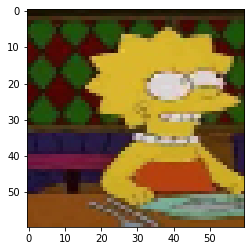

In [ ]:
plt.imshow(X_t[4][...,::-1]) # recordad que siempre es preferible trabajar en blanco y negro
plt.show()

Podemos ver que tenemos imágenes de 60x60 píxeles con tres canales de color. Ahora vamos a normalizar las imágenes que tenemos.

In [ ]:
X=X/255.
X_t=X_t/255.

Hacemos una partición en los datos de entrenamiento para obtener los datos de validación que vamos a utilizar.

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.20, random_state= 8)

Creamos nuestra clase callbacks para hacer Early Stopping cuando val_accuracy sea mayor a 0.85

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def __init__(self):
        self.actual_acc=0
        self.n_epochs=5
        self.epochs_without_improvement=0
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> self.actual_acc):
          self.actual_acc=logs.get('val_accuracy')
          self.epochs_without_improvement=0
        else:
          self.epochs_without_improvement+=1
        if self.epochs_without_improvement==self.n_epochs:
          self.model.stop_training = True
        #if(logs.get('val_accuracy')> 0.85):
        #      print("\nAlcanzado el 85% de accuracy en el set de validación, se cancela el entrenamiento!!")
        #      self.model.stop_training = True

#Creación de CNN propio

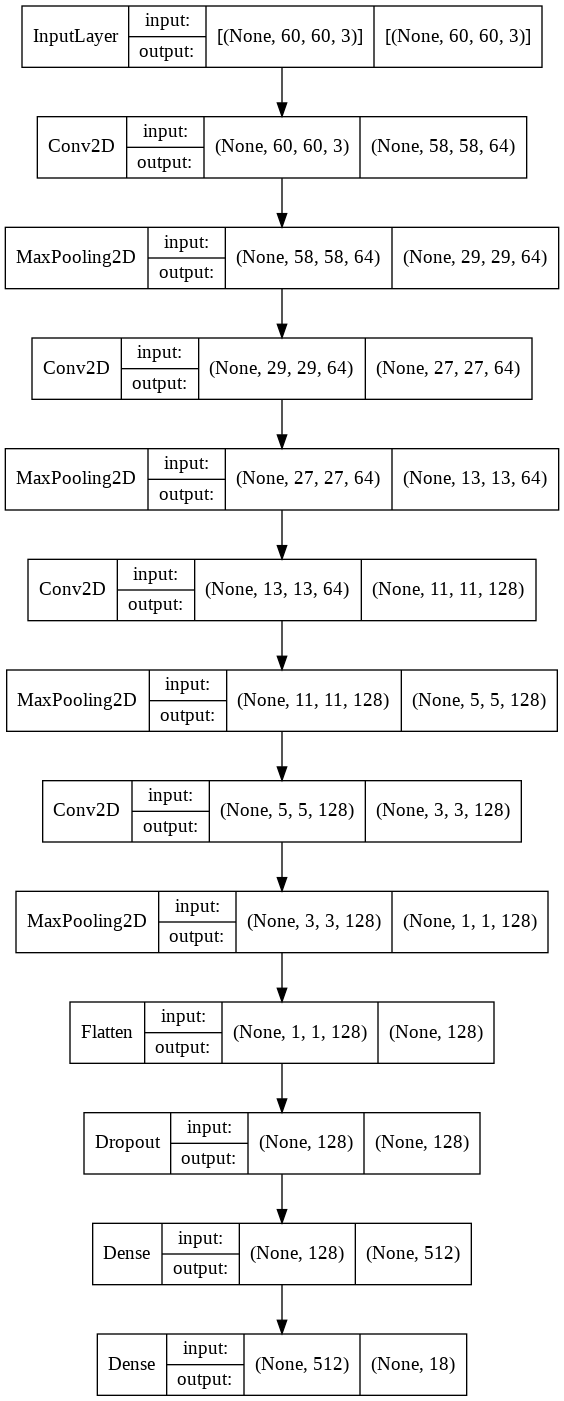

In [ ]:
import keras
import tensorflow as tf

callbacks=myCallback()
model=keras.models.Sequential()

#Primera capa convolucional
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(60,60,3)))
model.add(keras.layers.MaxPool2D(2,2))

#Segunda capa convolucional
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Tercera capa convolucional
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Cuarta capa convolucional
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Capa Fully Connected
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(18,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

 #Visualizamos nuestro modelo
keras.utils.vis_utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
history=model.fit(X_tr,y_tr,epochs=100,batch_size=64,validation_data=(X_val,y_val),callbacks=[callbacks])

Epoch 1/100
238/238 [==============================] - 5s 17ms/step - loss: 2.5135 - accuracy: 0.2104 - val_loss: 1.9745 - val_accuracy: 0.3588
Epoch 2/100
238/238 [==============================] - 4s 15ms/step - loss: 1.8246 - accuracy: 0.4209 - val_loss: 1.3968 - val_accuracy: 0.5709
Epoch 3/100
238/238 [==============================] - 3s 14ms/step - loss: 1.3832 - accuracy: 0.5628 - val_loss: 1.0514 - val_accuracy: 0.6670
Epoch 4/100
238/238 [==============================] - 3s 14ms/step - loss: 1.1275 - accuracy: 0.6370 - val_loss: 0.8812 - val_accuracy: 0.7231
Epoch 5/100
238/238 [==============================] - 3s 14ms/step - loss: 0.9673 - accuracy: 0.6942 - val_loss: 0.7682 - val_accuracy: 0.7678
Epoch 6/100
238/238 [==============================] - 3s 14ms/step - loss: 0.8331 - accuracy: 0.7336 - val_loss: 0.6950 - val_accuracy: 0.7847
Epoch 7/100
238/238 [==============================] - 3s 14ms/step - loss: 0.7346 - accuracy: 0.7669 - val_loss: 0.6374 - val_accuracy:

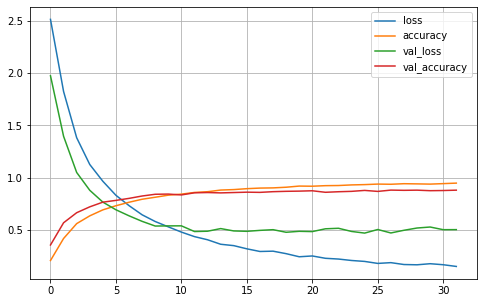

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
#plt.gca().set_ylim(0,1)
plt.show()

Ahora, podemos evaluzar nuestro modelo con los datos de test.

In [ ]:
model.evaluate(X_t,y_t)

28/28 [==============================] - 0s 8ms/step - loss: 0.1332 - accuracy: 0.9674


[0.13319674134254456, 0.9674157500267029]

Podemos ver que obtenemos unas métricas bastante buenas, llegando a obtener un 90% de accuracy en los datos de test. Ahora vamos a intentar obtener una matriz de confusión y un classification report de sklearn para poder ver que clases son en las que nuestro modelo cogea al predecir.

ETIQUETAS POR PERSONAJE
{0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

 MATRIZ DE CONFUSIÓN


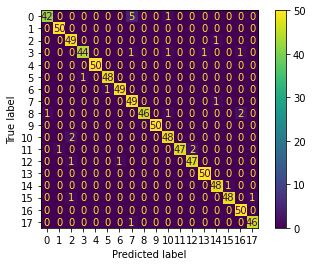


 CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      0.88      0.92        48
           1       0.98      1.00      0.99        50
           2       0.92      0.98      0.95        50
           3       0.98      0.92      0.95        48
           4       1.00      1.00      1.00        50
           5       0.98      0.98      0.98        49
           6       0.98      0.98      0.98        50
           7       0.88      0.98      0.92        50
           8       1.00      0.92      0.96        50
           9       1.00      1.00      1.00        50
          10       0.94      0.96      0.95        50
          11       1.00      0.94      0.97        50
          12       0.96      0.96      0.96        49
          13       0.98      1.00      0.99        50
          14       0.96      0.98      0.97        49
          15       0.98      0.96      0.97        50
          16       0.94      1.00      0.97        50
   

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print('ETIQUETAS POR PERSONAJE')
print(MAP_CHARACTERS)
y_pred=np.argmax(model.predict(X_t),axis=1)

print('\n MATRIZ DE CONFUSIÓN')
cm = confusion_matrix(y_t, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('\n CLASSIFICATION REPORT')
print(classification_report(y_t,y_pred))

Podemos ver que las métricas son bastante buenas, en la matriz de confusión es visible que donde más se equivica nuestro modelo es en la clasificación del personaje 'abraham_grampa_simpson', equivocándose y etiquetando a éste de manera errónea como el personaje 'Homer Simpson'. Por lo demás, podemos ver que las métricas que obtenemos para el modelo son bastante buenas para el recall, el presicion y el f1-score obteniendo para estas métricas unos valores mayores o iguales al 88% en todos los personajes a clasificar.